In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5219345


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5219345/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5219345/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [20]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'rand', "fold":5}
    types=['fwv']
    traintest = data.TrainTest('offset', offset=0, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

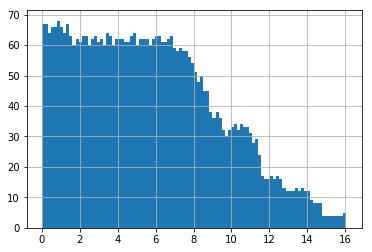

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.032763197384022

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
data=traintest.traindf
data.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4     fwv_5  \
index                                                                       
quake_07_0405  0.177243  0.148722  0.101298 -0.151453  0.118340  0.085533   
quake_07_0404  0.175916  0.208865  0.121425 -0.149945  0.078927 -0.033455   
quake_07_0159  0.123625  0.259964  0.114662 -0.177983  0.076714 -0.008650   
quake_07_0158  0.127892  0.236912  0.120239 -0.147701  0.065033 -0.029501   
quake_07_0401  0.168152  0.240921  0.146662 -0.184900  0.126381  0.005611   

                  fwv_6     fwv_7     fwv_8     fwv_9  ...    fwv_90  \
index                                                  ...             
quake_07_0405 -0.126488  0.383367  0.184891 -0.182000  ...  0.179080   
quake_07_0404 -0.001732  0.259981  0.170118 -0.146734  ...  0.115216   
quake_07_0159  0.029887  0.234569  0.166675 -0.139920  ...  0.126965   
quake_07_0158  0.007605  0.238272  0.166551 -0.104213  ...  0.100541   
quake_07_0401  0.008869  0.288528  0.169460 -0.190870  ...  0.106375   

                 fwv_91    fwv_92    fwv_93    fwv_94    fwv_95    fwv_96  \
index                                                                       
quake_07_0405  0.276661 -0.040588 -0.079376 -0.185854  0.031153  0.011661   
quake_07_0404  0.182124  0.020085  0.007380 -0.045135  0.012951  0.022898   
quake_07_0159  0.131131  0.068873  0.045272  0.115157  0.038833  0.072388   
quake_07_0158  0.158076  0.011800  0.050090  0.066010  0.055765  0.051091   
quake_07_0401  0.173906  0.000818  0.020374 -0.018780  0.006945  0.040418   

                 fwv_97    fwv_98    fwv_99  
index                                        
quake_07_0405 -0.177359  0.021507  0.143021  
quake_07_0404 -0.136806  0.015471  0.179152  
quake_07_0159 -0.109722 -0.035507  0.092227  
quake_07_0158 -0.113880  0.000226  0.118060  
quake_07_0401 -0.139294 -0.030202  0.189248  

[5 rows x 100 columns]

In [15]:
ydf=traintest.ydf
ydf.head()

index
quake_07_0405    0.287999
quake_07_0404    0.327298
quake_07_0159    9.873498
quake_07_0158    9.912896
quake_07_0401    0.444397
Name: y, dtype: float64

In [16]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index               
quake_07_0405      7
quake_07_0404      7
quake_07_0159      7
quake_07_0158      7
quake_07_0401      7

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
index  37  296  363  227  325  206  181  413  202  247  293  282  226  219   

        14   15  16  
index  378  242  47

In [18]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{0: 37,
 1: 296,
 2: 363,
 3: 227,
 4: 325,
 5: 206,
 6: 181,
 7: 413,
 8: 202,
 9: 247,
 10: 293,
 11: 282,
 12: 226,
 13: 219,
 14: 378,
 15: 242,
 16: 47}

In [19]:
quakes=set(qdf['index'])
quakes.remove(0)
quakes.remove(16)
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [20]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [25]:
sklearn.__version__

'0.20.2'

In [55]:
qdf.shape,data.shape

((4184, 1), (4184, 100))

In [62]:
from sklearn import model_selection
def train_quake(qno1,params,n_thread):
    assert (qno1 in quakes)
    print 'valid quake', qno1
    allidx=qdf['index']==qno1
    allidx= allidx.iloc[np.random.permutation(range(len(allidx)))]
    kf = model_selection.KFold(n_splits=5)
    scores=[]
    for train_index, test_index in kf.split(allidx):
        teidx= allidx.iloc[test_index]
        tridx=allidx.iloc[train_index]
        print tridx.shape,teidx.shape
        Xtr,ytr,Xte,yte=data.loc[tridx.index][tridx.values],ydf.loc[tridx.index][tridx.values],\
            data.loc[teidx.index][teidx.values],ydf.loc[teidx.index][teidx.values]
        #display(Xtr)
        Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
        print Xtr.shape,ytr.shape,Xte.shape,yte.shape
        model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
        model.fit(Xtr, ytr, 
                        eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                        verbose=50, early_stopping_rounds=200)
        print  model.best_score['valid_1']['l1'], model.best_iteration
        scores.append(model.best_score['valid_1']['l1'])
    print "scores", scores
    return np.mean(scores)

In [82]:
params = {'num_leaves': 54,
          #'min_data_in_leaf': 10,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [83]:
validScores={}
for qno1 in quakes:
    s=train_quake(qno1, params,n_thread)
    print "quake ", qno1, s
    validScores[qno1]=s

valid quake 1
(3347,) (837,)
(229, 100) (229,) (67, 100) (67,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.38495	valid_1's l1: 1.58974
[100]	training's l1: 0.97293	valid_1's l1: 1.27555
[150]	training's l1: 0.758092	valid_1's l1: 1.15399
[200]	training's l1: 0.631163	valid_1's l1: 1.10773
[250]	training's l1: 0.540985	valid_1's l1: 1.09323
[300]	training's l1: 0.475966	valid_1's l1: 1.08892
[350]	training's l1: 0.431947	valid_1's l1: 1.10222
[400]	training's l1: 0.398785	valid_1's l1: 1.11179
[450]	training's l1: 0.369491	valid_1's l1: 1.12363
Early stopping, best iteration is:
[290]	training's l1: 0.487011	valid_1's l1: 1.08612
1.0861190426558605 290
(3347,) (837,)
(243, 100) (243,) (53, 100) (53,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.32574	valid_1's l1: 1.59157
[100]	training's l1: 0.914217	valid_1's l1: 1.40588
[150]	training's l1: 0.713563	valid_1's l1: 1.3347
[200]	training's l1: 0.595642	vali

[600]	training's l1: 0.322514	valid_1's l1: 1.35502
Early stopping, best iteration is:
[410]	training's l1: 0.450996	valid_1's l1: 1.33905
1.3390519754728096 410
scores [1.3842346956357339, 1.1499477663683386, 1.4216394094843243, 1.7482935894882108, 1.3390519754728096]
quake  2 1.4086334872898836
valid quake 3
(3347,) (837,)
(177, 100) (177,) (50, 100) (50,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.948803	valid_1's l1: 1.12781
[100]	training's l1: 0.643564	valid_1's l1: 0.90529
[150]	training's l1: 0.495412	valid_1's l1: 0.827233
[200]	training's l1: 0.407761	valid_1's l1: 0.78923
[250]	training's l1: 0.35412	valid_1's l1: 0.775908
[300]	training's l1: 0.312935	valid_1's l1: 0.770032
[350]	training's l1: 0.284276	valid_1's l1: 0.765028
[400]	training's l1: 0.261258	valid_1's l1: 0.763671
[450]	training's l1: 0.241529	valid_1's l1: 0.767375
[500]	training's l1: 0.223864	valid_1's l1: 0.772925
[550]	training's l1: 0.21051	valid_1's l1: 0.775052

[200]	training's l1: 0.590461	valid_1's l1: 1.30514
[250]	training's l1: 0.507417	valid_1's l1: 1.31475
[300]	training's l1: 0.446624	valid_1's l1: 1.31218
[350]	training's l1: 0.401402	valid_1's l1: 1.30305
Early stopping, best iteration is:
[185]	training's l1: 0.622002	valid_1's l1: 1.30081
1.3008098192572108 185
(3348,) (836,)
(266, 100) (266,) (59, 100) (59,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.37348	valid_1's l1: 1.48997
[100]	training's l1: 0.946571	valid_1's l1: 1.20038
[150]	training's l1: 0.745594	valid_1's l1: 1.10796
[200]	training's l1: 0.611091	valid_1's l1: 1.09224
[250]	training's l1: 0.518881	valid_1's l1: 1.08816
[300]	training's l1: 0.449994	valid_1's l1: 1.09099
[350]	training's l1: 0.393885	valid_1's l1: 1.07429
[400]	training's l1: 0.351264	valid_1's l1: 1.07039
[450]	training's l1: 0.316886	valid_1's l1: 1.07162
[500]	training's l1: 0.2873	valid_1's l1: 1.07301
[550]	training's l1: 0.262786	valid_1's l1: 1.0734
[60

[300]	training's l1: 0.248971	valid_1's l1: 0.750768
[350]	training's l1: 0.217692	valid_1's l1: 0.760432
[400]	training's l1: 0.191435	valid_1's l1: 0.759425
[450]	training's l1: 0.169214	valid_1's l1: 0.759279
[500]	training's l1: 0.151909	valid_1's l1: 0.762493
Early stopping, best iteration is:
[300]	training's l1: 0.248971	valid_1's l1: 0.750768
0.7507676628232435 300
(3348,) (836,)
(140, 100) (140,) (41, 100) (41,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859086	valid_1's l1: 0.938678
[100]	training's l1: 0.577977	valid_1's l1: 0.882034
[150]	training's l1: 0.446506	valid_1's l1: 0.864712
[200]	training's l1: 0.36422	valid_1's l1: 0.869974
[250]	training's l1: 0.305687	valid_1's l1: 0.889574
[300]	training's l1: 0.26714	valid_1's l1: 0.902441
Early stopping, best iteration is:
[125]	training's l1: 0.506662	valid_1's l1: 0.859751
0.8597512015684007 125
scores [0.7152574215442116, 0.5639872039822603, 0.845219473372833, 0.7507676628232435,

[200]	training's l1: 0.376536	valid_1's l1: 0.666363
[250]	training's l1: 0.323288	valid_1's l1: 0.646371
[300]	training's l1: 0.282222	valid_1's l1: 0.644833
[350]	training's l1: 0.25257	valid_1's l1: 0.641389
[400]	training's l1: 0.228487	valid_1's l1: 0.642359
[450]	training's l1: 0.208664	valid_1's l1: 0.643389
[500]	training's l1: 0.191192	valid_1's l1: 0.639612
[550]	training's l1: 0.178508	valid_1's l1: 0.647182
Early stopping, best iteration is:
[385]	training's l1: 0.23509	valid_1's l1: 0.638467
0.6384669188698457 385
(3348,) (836,)
(166, 100) (166,) (36, 100) (36,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.845093	valid_1's l1: 1.06425
[100]	training's l1: 0.540645	valid_1's l1: 0.798065
[150]	training's l1: 0.406023	valid_1's l1: 0.722207
[200]	training's l1: 0.332598	valid_1's l1: 0.704196
[250]	training's l1: 0.28422	valid_1's l1: 0.697669
[300]	training's l1: 0.246467	valid_1's l1: 0.700569
[350]	training's l1: 0.218085	valid_1's 

1.166146726986737 648
(3348,) (836,)
(231, 100) (231,) (62, 100) (62,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.25431	valid_1's l1: 1.50056
[100]	training's l1: 0.857077	valid_1's l1: 1.31323
[150]	training's l1: 0.675838	valid_1's l1: 1.28622
[200]	training's l1: 0.565011	valid_1's l1: 1.29397
[250]	training's l1: 0.488288	valid_1's l1: 1.30387
[300]	training's l1: 0.431576	valid_1's l1: 1.30153
Early stopping, best iteration is:
[149]	training's l1: 0.678478	valid_1's l1: 1.28541
1.285414983262647 149
scores [1.0392860756116282, 0.8947714237337423, 0.9044665870875395, 1.166146726986737, 1.285414983262647]
quake  10 1.0580171593364587
valid quake 11
(3347,) (837,)
(222, 100) (222,) (60, 100) (60,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.19722	valid_1's l1: 1.3048
[100]	training's l1: 0.817336	valid_1's l1: 1.09073
[150]	training's l1: 0.645337	valid_1's l1: 1.0005
[200]	training's l1: 0.538793	val

[600]	training's l1: 0.208559	valid_1's l1: 0.683072
Early stopping, best iteration is:
[425]	training's l1: 0.263763	valid_1's l1: 0.678443
0.6784425306500462 425
(3348,) (836,)
(184, 100) (184,) (42, 100) (42,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.931506	valid_1's l1: 1.00322
[100]	training's l1: 0.602442	valid_1's l1: 0.799125
[150]	training's l1: 0.452439	valid_1's l1: 0.801487
[200]	training's l1: 0.361987	valid_1's l1: 0.803526
[250]	training's l1: 0.306505	valid_1's l1: 0.810453
[300]	training's l1: 0.267785	valid_1's l1: 0.823808
Early stopping, best iteration is:
[129]	training's l1: 0.504978	valid_1's l1: 0.796031
0.7960309923140946 129
scores [0.48643436830294423, 0.7311451025304355, 0.8198617829595825, 0.6784425306500462, 0.7960309923140946]
quake  12 0.7023829553514205
valid quake 13
(3347,) (837,)
(177, 100) (177,) (42, 100) (42,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05716	vali

[50]	training's l1: 1.79221	valid_1's l1: 2.05236
[100]	training's l1: 1.27961	valid_1's l1: 1.77127
[150]	training's l1: 1.01897	valid_1's l1: 1.67876
[200]	training's l1: 0.868702	valid_1's l1: 1.62441
[250]	training's l1: 0.76703	valid_1's l1: 1.60091
[300]	training's l1: 0.68354	valid_1's l1: 1.61172
[350]	training's l1: 0.624461	valid_1's l1: 1.62494
[400]	training's l1: 0.573294	valid_1's l1: 1.62222
Early stopping, best iteration is:
[241]	training's l1: 0.783476	valid_1's l1: 1.59967
1.5996697936107263 241
scores [1.6557911021208622, 1.3472832533442556, 1.4350365227002062, 1.6145792171804962, 1.5996697936107263]
quake  14 1.5304719777913092
valid quake 15
(3347,) (837,)
(192, 100) (192,) (50, 100) (50,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.96639	valid_1's l1: 1.22801
[100]	training's l1: 0.660969	valid_1's l1: 0.941021
[150]	training's l1: 0.508716	valid_1's l1: 0.81179
[200]	training's l1: 0.436229	valid_1's l1: 0.770372
[250]	tr

In [84]:
vdf=pd.Series(validScores).to_frame().reset_index()
vdf.columns=['q1','score']
vdf=vdf.sort_values('score').reset_index(drop=True)
vdf

q1     score
0    8  0.622846
1    5  0.665808
2    3  0.681583
3   12  0.702383
4   15  0.738337
5    6  0.746997
6    9  0.817509
7   13  0.826609
8   11  0.938519
9   10  1.058017
10   4  1.138106
11   1  1.164139
12   2  1.408633
13  14  1.530472
14   7  1.886111

In [92]:
from sklearn import model_selection
def train_quake(qno1,params,n_thread):
    assert (qno1 in quakes)
    print 'valid quake', qno1
    otherindex= ~(qdf['index']==qno1)
    allidx=qdf['index']==qno1
    allidx= allidx.iloc[np.random.permutation(range(len(allidx)))]
    kf = model_selection.KFold(n_splits=5)
    scores=[]
    for train_index, test_index in kf.split(allidx):
        teidx= allidx.iloc[test_index]
        tridx=allidx.iloc[train_index]
        tridx=otherindex | tridx
        print tridx.shape,teidx.shape
        Xtr,ytr,Xte,yte=data.loc[tridx.index][tridx.values],ydf.loc[tridx.index][tridx.values],\
            data.loc[teidx.index][teidx.values],ydf.loc[teidx.index][teidx.values]
        #display(Xtr)
        Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
        print Xtr.shape,ytr.shape,Xte.shape,yte.shape
        model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
        model.fit(Xtr, ytr, 
                        eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                        verbose=50, early_stopping_rounds=200)
        print  model.best_score['valid_1']['l1'], model.best_iteration
        scores.append(model.best_score['valid_1']['l1'])
    print "scores", scores
    return np.mean(scores)

In [93]:
params = {'num_leaves': 54,
          #'min_data_in_leaf': 10,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [94]:
validScores={}
for qno1 in quakes:
    s=train_quake(qno1, params,n_thread)
    print "quake ", qno1, s
    validScores[qno1]=s

valid quake 1
(4184,) (837,)
(4120, 100) (4120,) (64, 100) (64,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09084	valid_1's l1: 1.98571
[100]	training's l1: 1.76244	valid_1's l1: 1.73948
[150]	training's l1: 1.58471	valid_1's l1: 1.59532
[200]	training's l1: 1.46643	valid_1's l1: 1.50228
[250]	training's l1: 1.37831	valid_1's l1: 1.46895
[300]	training's l1: 1.29908	valid_1's l1: 1.42974
[350]	training's l1: 1.23186	valid_1's l1: 1.41733
[400]	training's l1: 1.17041	valid_1's l1: 1.41326
[450]	training's l1: 1.11579	valid_1's l1: 1.41054
[500]	training's l1: 1.06507	valid_1's l1: 1.40392
[550]	training's l1: 1.01436	valid_1's l1: 1.39841
[600]	training's l1: 0.969497	valid_1's l1: 1.40592
[650]	training's l1: 0.927601	valid_1's l1: 1.40751
[700]	training's l1: 0.886652	valid_1's l1: 1.4107
[750]	training's l1: 0.849431	valid_1's l1: 1.40992
Early stopping, best iteration is:
[568]	training's l1: 0.998438	valid_1's l1: 1.39317
1.393170602875285 

[150]	training's l1: 1.56201	valid_1's l1: 3.25351
[200]	training's l1: 1.44644	valid_1's l1: 3.18145
[250]	training's l1: 1.36157	valid_1's l1: 3.13435
[300]	training's l1: 1.28431	valid_1's l1: 3.10822
[350]	training's l1: 1.21472	valid_1's l1: 3.08664
[400]	training's l1: 1.15431	valid_1's l1: 3.07589
[450]	training's l1: 1.09827	valid_1's l1: 3.06043
[500]	training's l1: 1.04808	valid_1's l1: 3.05437
[550]	training's l1: 1.00144	valid_1's l1: 3.05431
[600]	training's l1: 0.956443	valid_1's l1: 3.04461
[650]	training's l1: 0.914494	valid_1's l1: 3.05064
[700]	training's l1: 0.876998	valid_1's l1: 3.04638
[750]	training's l1: 0.839675	valid_1's l1: 3.0352
[800]	training's l1: 0.805159	valid_1's l1: 3.02833
[850]	training's l1: 0.77276	valid_1's l1: 3.02561
[900]	training's l1: 0.740058	valid_1's l1: 3.02023
[950]	training's l1: 0.709996	valid_1's l1: 3.01964
[1000]	training's l1: 0.680616	valid_1's l1: 3.01668
[1050]	training's l1: 0.652482	valid_1's l1: 3.01583
[1100]	training's l1:

[50]	training's l1: 2.08715	valid_1's l1: 2.62211
[100]	training's l1: 1.75958	valid_1's l1: 2.37961
[150]	training's l1: 1.58086	valid_1's l1: 2.28662
[200]	training's l1: 1.46583	valid_1's l1: 2.2219
[250]	training's l1: 1.3731	valid_1's l1: 2.1852
[300]	training's l1: 1.29464	valid_1's l1: 2.161
[350]	training's l1: 1.22747	valid_1's l1: 2.15481
[400]	training's l1: 1.16457	valid_1's l1: 2.13144
[450]	training's l1: 1.11031	valid_1's l1: 2.11167
[500]	training's l1: 1.05871	valid_1's l1: 2.09457
[550]	training's l1: 1.01166	valid_1's l1: 2.07653
[600]	training's l1: 0.966244	valid_1's l1: 2.07056
[650]	training's l1: 0.923553	valid_1's l1: 2.06394
[700]	training's l1: 0.884899	valid_1's l1: 2.05857
[750]	training's l1: 0.846958	valid_1's l1: 2.05439
[800]	training's l1: 0.811894	valid_1's l1: 2.04627
[850]	training's l1: 0.778501	valid_1's l1: 2.03842
[900]	training's l1: 0.746605	valid_1's l1: 2.03085
[950]	training's l1: 0.7172	valid_1's l1: 2.02717
[1000]	training's l1: 0.68761	v

[200]	training's l1: 1.45575	valid_1's l1: 2.34257
[250]	training's l1: 1.36492	valid_1's l1: 2.37567
Early stopping, best iteration is:
[59]	training's l1: 2.00912	valid_1's l1: 2.17049
2.170493296287664 59
(4184,) (837,)
(4144, 100) (4144,) (40, 100) (40,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09482	valid_1's l1: 1.94426
[100]	training's l1: 1.75901	valid_1's l1: 2.09818
[150]	training's l1: 1.57924	valid_1's l1: 2.19209
[200]	training's l1: 1.464	valid_1's l1: 2.23429
Early stopping, best iteration is:
[39]	training's l1: 2.21095	valid_1's l1: 1.91627
1.916274839524648 39
(4184,) (837,)
(4134, 100) (4134,) (50, 100) (50,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09209	valid_1's l1: 1.78661
[100]	training's l1: 1.75977	valid_1's l1: 1.9715
[150]	training's l1: 1.57741	valid_1's l1: 2.07574
[200]	training's l1: 1.46014	valid_1's l1: 2.12991
Early stopping, best iteration is:
[28]	training's l1: 

[800]	training's l1: 0.797042	valid_1's l1: 3.21368
[850]	training's l1: 0.763596	valid_1's l1: 3.20924
[900]	training's l1: 0.73263	valid_1's l1: 3.20499
[950]	training's l1: 0.70452	valid_1's l1: 3.20159
[1000]	training's l1: 0.675255	valid_1's l1: 3.20207
[1050]	training's l1: 0.647964	valid_1's l1: 3.205
[1100]	training's l1: 0.621341	valid_1's l1: 3.19899
[1150]	training's l1: 0.596717	valid_1's l1: 3.19752
[1200]	training's l1: 0.574366	valid_1's l1: 3.20186
[1250]	training's l1: 0.552688	valid_1's l1: 3.20301
[1300]	training's l1: 0.5317	valid_1's l1: 3.20144
[1350]	training's l1: 0.511184	valid_1's l1: 3.20018
Early stopping, best iteration is:
[1152]	training's l1: 0.595772	valid_1's l1: 3.19746
3.197455666761796 1152
(4184,) (837,)
(4111, 100) (4111,) (73, 100) (73,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.07024	valid_1's l1: 3.73697
[100]	training's l1: 1.73596	valid_1's l1: 3.5639
[150]	training's l1: 1.5576	valid_1's l1: 3.46796

[50]	training's l1: 2.09966	valid_1's l1: 1.49122
[100]	training's l1: 1.76594	valid_1's l1: 1.2694
[150]	training's l1: 1.58339	valid_1's l1: 1.19564
[200]	training's l1: 1.46592	valid_1's l1: 1.17143
[250]	training's l1: 1.37245	valid_1's l1: 1.16454
[300]	training's l1: 1.29323	valid_1's l1: 1.17418
[350]	training's l1: 1.22474	valid_1's l1: 1.18588
[400]	training's l1: 1.16322	valid_1's l1: 1.19912
[450]	training's l1: 1.10666	valid_1's l1: 1.20317
Early stopping, best iteration is:
[254]	training's l1: 1.36556	valid_1's l1: 1.16355
1.1635465109102137 254
scores [1.1354459661368665, 1.0109907637359912, 0.9378536112124509, 1.005323247571689, 1.1635465109102137]
quake  9 1.0506320199134422
valid quake 10
(4184,) (837,)
(4134, 100) (4134,) (50, 100) (50,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09551	valid_1's l1: 2.20038
[100]	training's l1: 1.76951	valid_1's l1: 1.79969
[150]	training's l1: 1.58455	valid_1's l1: 1.57435
[200]	training's l

[250]	training's l1: 1.37553	valid_1's l1: 1.05259
[300]	training's l1: 1.29484	valid_1's l1: 1.04077
[350]	training's l1: 1.22633	valid_1's l1: 1.03738
[400]	training's l1: 1.16339	valid_1's l1: 1.05297
[450]	training's l1: 1.10819	valid_1's l1: 1.05154
[500]	training's l1: 1.05775	valid_1's l1: 1.05514
[550]	training's l1: 1.01036	valid_1's l1: 1.06487
Early stopping, best iteration is:
[364]	training's l1: 1.20724	valid_1's l1: 1.0356
1.035597199536264 364
(4184,) (837,)
(4124, 100) (4124,) (60, 100) (60,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09607	valid_1's l1: 1.87247
[100]	training's l1: 1.76203	valid_1's l1: 1.6078
[150]	training's l1: 1.58487	valid_1's l1: 1.48463
[200]	training's l1: 1.46391	valid_1's l1: 1.43002
[250]	training's l1: 1.3749	valid_1's l1: 1.37651
[300]	training's l1: 1.29746	valid_1's l1: 1.35135
[350]	training's l1: 1.2303	valid_1's l1: 1.32249
[400]	training's l1: 1.16807	valid_1's l1: 1.30886
[450]	training's l

[50]	training's l1: 2.09767	valid_1's l1: 1.23503
[100]	training's l1: 1.76414	valid_1's l1: 1.25317
[150]	training's l1: 1.58216	valid_1's l1: 1.31842
[200]	training's l1: 1.46455	valid_1's l1: 1.35323
[250]	training's l1: 1.37285	valid_1's l1: 1.38585
Early stopping, best iteration is:
[68]	training's l1: 1.95186	valid_1's l1: 1.22766
1.2276604491358503 68
(4184,) (836,)
(4128, 100) (4128,) (56, 100) (56,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09739	valid_1's l1: 1.51064
[100]	training's l1: 1.7647	valid_1's l1: 1.46865
[150]	training's l1: 1.58341	valid_1's l1: 1.52878
[200]	training's l1: 1.4624	valid_1's l1: 1.57181
[250]	training's l1: 1.37209	valid_1's l1: 1.60695
Early stopping, best iteration is:
[90]	training's l1: 1.81531	valid_1's l1: 1.46209
1.4620902631428143 90
scores [1.396732695363007, 1.4791432200961554, 1.6368855710919838, 1.2276604491358503, 1.4620902631428143]
quake  13 1.4405024397659623
valid quake 14
(4184,) (837,)


[1000]	training's l1: 0.682852	valid_1's l1: 2.82333
[1050]	training's l1: 0.65554	valid_1's l1: 2.81101
[1100]	training's l1: 0.629658	valid_1's l1: 2.80984
[1150]	training's l1: 0.605556	valid_1's l1: 2.80719
[1200]	training's l1: 0.581706	valid_1's l1: 2.80731
[1250]	training's l1: 0.560229	valid_1's l1: 2.80707
[1300]	training's l1: 0.538241	valid_1's l1: 2.80696
[1350]	training's l1: 0.51765	valid_1's l1: 2.80192
[1400]	training's l1: 0.497907	valid_1's l1: 2.80076
[1450]	training's l1: 0.478385	valid_1's l1: 2.79948
[1500]	training's l1: 0.461059	valid_1's l1: 2.79848
2.7984826599352006 0
scores [3.266129045580374, 2.995640245332316, 2.940197480003755, 2.9755853471974727, 2.7984826599352006]
quake  14 2.9952069556098238
valid quake 15
(4184,) (837,)
(4147, 100) (4147,) (37, 100) (37,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.09404	valid_1's l1: 1.3699
[100]	training's l1: 1.75994	valid_1's l1: 1.1717
[150]	training's l1: 1.586	valid_1's

In [95]:
vdf=pd.Series(validScores).to_frame().reset_index()
vdf.columns=['q1','score']
vdf=vdf.sort_values('score').reset_index(drop=True)
vdf

q1     score
0    9  1.050632
1    3  1.184935
2   15  1.190333
3   11  1.217266
4   12  1.257667
5   10  1.357171
6   13  1.440502
7    1  1.497242
8    5  1.919361
9    4  1.928730
10   8  1.992337
11   6  2.252606
12   2  2.610399
13  14  2.995207
14   7  3.312519